Disc (all 128) last good results


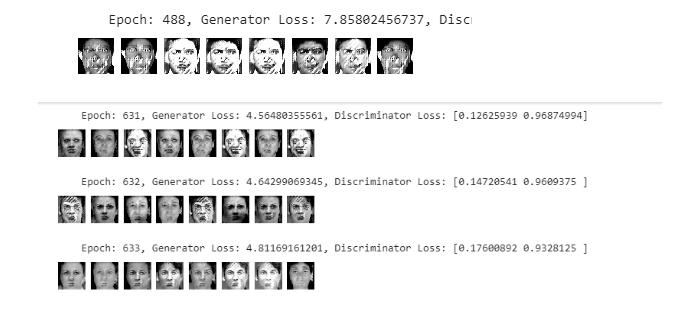

In [0]:
from IPython.display import Image
Image("NN.png")
Image("NN1.png")

# # plt.subplot(1,1,1)
# plt.imshow(io.imread('NN.png')) # *-1 because plt inverts colors for some reason (255 is black)
# plt.axis('off')
# # plt.subplot(1,2,2)

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from __future__ import print_function, division

from keras.layers import Input, Dense, Flatten, Dropout, Reshape, Concatenate
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam

from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt

import sys
import numpy as np

import os
import numpy as np
import pandas as pd
from skimage import io
from skimage.transform import resize
from keras.layers import Input, Dense, Flatten, Dropout, Reshape, Concatenate, UpSampling2D
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose,MaxPooling2D,AveragePooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
import time
import random
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['resize', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
from keras.preprocessing import image
# os.makedirs('combined')
num_classes = 8

def load_data(img_shape):
    path = r'combined'
    fileNames = [f for f in sorted(os.listdir(path))]
    images = np.array([np.array(resize(io.imread(path + '/' + f, as_grey=True), img_shape)) for f in fileNames])

    #reshape
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 1)
    labels = np.array([f.split('.')[0].split('_')[2] for f in fileNames])
    return images, labels

def one_hot_encode(y):
  z = np.zeros((len(y), num_classes))
  idx = np.arange(len(y))
  z[idx, y] = 1
  return z

def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

def generate_random_labels(n):
  y = np.random.choice(num_classes, n)
  y = one_hot_encode(y)
  return y

tags = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
  
def show_samples(batchidx):
  noise = generate_noise(num_classes,100)
  labels = np.array(pd.get_dummies(range(num_classes)))
  prediction = generator.predict([noise, labels])
#   plt.imshow(prediction[0,:,:,0]*(-1), cmap=plt.cm.binary)
  fig = plt.figure()
#   plt.suptitle(f'Epoch: {epoch+1}')
  for i in range(num_classes):
      plt.subplot(1,num_classes,i+1)
#       plt.title(f'{i}')
      plt.imshow(prediction[i,:,:,0]*(-1), cmap=plt.cm.binary) # *-1 because plt inverts colors for some reason (255 is black)
      plt.axis('off')
#   fig, axs = plt.subplots(5, 6, figsize=(7,6))
#   plt.subplots_adjust(hspace=0.3, wspace=0.1)
#   #fig, axs = plt.subplots(5, 6)
#   #fig.tight_layout()
#   for classlabel in range(num_classes):
#     row = int(classlabel / 2)
#     coloffset = (classlabel % 2) * 3
#     lbls = one_hot_encode([classlabel] * 3)
#     noise = generate_noise(3, 100)
#     gen_imgs = generator.predict([noise, lbls])

#     for i in range(3):
#         # Dont scale the images back, let keras handle it
#         img = image.array_to_img(gen_imgs[i], scale=True)
#         axs[row,i+coloffset].imshow(img)
#         axs[row,i+coloffset].axis('off')
#         if i ==1:
#           axs[row,i+coloffset].set_title(tags[classlabel])
  plt.show()
  plt.close()  

In [0]:
os.makedirs('combined')

In [0]:
# import shutil
# shutil.rmtree('combined')
BATCH_SIZE = 40

# # Get training images
X_train, y_train = load_data((128,128,1))

# Normalize data
X_train = (X_train - 0.5) / 0.5

# 1hot encode labels
y_train = np.array(pd.get_dummies(y_train))
# print(y_train.shape)
# y_train = one_hot_encode(y_train[:,0])
print(y_train.shape)
print ("Training shape: {}".format(X_train.shape))
 
num_batches = int(X_train.shape[0]/BATCH_SIZE)
print(num_batches)

In [0]:
def get_generator(input_layer, condition_layer):

  merged_input = Concatenate()([input_layer, condition_layer])
  
  hid = Dense(512 * 8 * 8, activation='relu')(merged_input)    
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Reshape((8, 8, 512))(hid)

  hid = Conv2DTranspose(512, 5, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(256, 5, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

#   hid = Conv2D(128, kernel_size=5, strides=2,padding='same')(hid)
#   hid = BatchNormalization(momentum=0.9)(hid)    
#   hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(64, 5, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  
#   hid = Conv2D(128, kernel_size=5, strides=1,padding='same')(hid)
#   hid = BatchNormalization(momentum=0.9)(hid)    
#   hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  
#   hid = Conv2D(128, kernel_size=5, strides=1,padding='same')(hid)
#   hid = BatchNormalization(momentum=0.9)(hid)    
#   hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

#   hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
#   hid = BatchNormalization(momentum=0.9)(hid)
#   hid = LeakyReLU(alpha=0.1)(hid)

#   hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
#   hid = BatchNormalization(momentum=0.9)(hid)
#   hid = LeakyReLU(alpha=0.1)(hid)
                      
  hid = Conv2D(1, kernel_size=5, strides=1, padding="same")(hid)
  out = Activation("tanh")(hid)

  model = Model(inputs=[input_layer, condition_layer], outputs=out)
#   model.summary()
  
  return model, out


In [0]:
def get_discriminator(input_layer, condition_layer):
  #Input 128.128.1
  hid = Conv2D(128, kernel_size=3, strides=2, padding='same')(input_layer)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Dropout(0.5)(hid)
  #64x64x128
  hid = Conv2D(128, kernel_size=5, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Dropout(0.5)(hid)
  #32x32x128
  hid = Conv2D(128, kernel_size=5, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Dropout(0.5)(hid)
  #16x16x128
  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Dropout(0.5)(hid)
  #16x16x256
  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  #16x16x256

  hid = Flatten()(hid)
  
#   flat = Flatten()(input_layer)
  
#   hid = Dense(512)(flat)
#   hid = LeakyReLU(alpha=0.1)(hid)
#   hid = Dropout(0.5)(hid)
#   hid = Dense(256)(hid)
#   hid = LeakyReLU(alpha=0.1)(hid)
#   hid = Dropout(0.5)(hid)
#   hid = Dense(128)(hid)
#   hid = LeakyReLU(alpha=0.1)(hid)
  
  merged_layer = Concatenate()([hid, condition_layer])
  hid = Dense(128, activation='relu')(merged_layer)
  #hid = Dropout(0.4)(hid)
  out = Dense(1, activation='sigmoid')(hid)

  model = Model(inputs=[input_layer, condition_layer], outputs=out)

  model.summary()

  return model, out

In [0]:
# GAN creation
img_input = Input(shape=(128,128,1))
noise_input = Input(shape=(100,))
gen_condition_input = Input(shape=(num_classes,))
generator, gen_out = get_generator(noise_input, gen_condition_input)

disc_condition_input = Input(shape=(num_classes,))

discriminator, disc_out = get_discriminator(img_input, disc_condition_input)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False


gan_input = Input(shape=(100,))
x = generator([noise_input, gen_condition_input])
gan_out = discriminator([x, disc_condition_input])
gan = Model(inputs=[noise_input, gen_condition_input, disc_condition_input], output=gan_out)
# gan.summary()

gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy')

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 64, 64, 64)   640         input_16[0][0]                   
__________________________________________________________________________________________________
batch_normalization_52 (BatchNo (None, 64, 64, 64)   256         conv2d_32[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_52 (LeakyReLU)      (None, 64, 64, 64)   0           batch_normalization_52[0][0]     
__________________________________________________________________________________________________
dropout_13

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("mo...)`


In [0]:
# Array to store samples for experience replay
exp_replay = []

In [0]:
N_EPOCHS = 5000
half_batch = int(BATCH_SIZE/2)

for epoch in range(N_EPOCHS):

  cum_d_loss = 0.
  cum_g_loss = 0.
  
  for batch_idx in range(num_batches):
#     # Get the next set of real images to be used in this iteration
#     images = X_train[batch_idx*half_batch : (batch_idx+1)*half_batch]
#     labels = y_train[batch_idx*half_batch : (batch_idx+1)*half_batch]

#     noise_data = generate_noise(half_batch, 100)
#     random_labels = generate_random_labels(half_batch)
#     # We use same labels for generated images as in the real training batch
#     generated_images = generator.predict([noise_data, labels])

#     # Train on soft targets (add noise to targets as well)
#     noise_prop = 0.05 # Randomly flip 5% of targets
    
#     # Prepare labels for real data
#     true_labels = np.zeros((half_batch, 1)) + np.random.uniform(low=0.0, high=0.1, size=(half_batch, 1))
#     flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
#     true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
    
#     # Train discriminator on real data
#     d_loss_true = discriminator.train_on_batch([images, labels], true_labels)

#     # Prepare labels for generated data
#     gene_labels = np.ones((half_batch, 1)) - np.random.uniform(low=0.0, high=0.1, size=(half_batch, 1))
#     flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
#     gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]
    
#     # Train discriminator on generated data
#     d_loss_gene = discriminator.train_on_batch([generated_images, labels], gene_labels)
    
#     # Store a random point for experience replay
#     r_idx = np.random.randint(half_batch)
#     exp_replay.append([generated_images[r_idx], labels[r_idx], gene_labels[r_idx]])
    
#     #If we have enough points, do experience replay
#     if len(exp_replay) == half_batch:
#       generated_images = np.array([p[0] for p in exp_replay])
#       labels = np.array([p[1] for p in exp_replay])
#       gene_labels = np.array([p[2] for p in exp_replay])
#       expprep_loss_gene = discriminator.train_on_batch([generated_images, labels], gene_labels)
#       exp_replay = []
#       break
    
    indxs = np.random.randint(0, X_train.shape[0],half_batch)
    imgs = X_train[indxs]
    labels = y_train[indxs]
    
    noise_data = generate_noise(half_batch, 100)
    random_labels = generate_random_labels(half_batch)
    generated_images = generator.predict([noise_data, labels])
    
    d_fake_loss = discriminator.train_on_batch([imgs, labels], np.ones((half_batch,1)))
    d_art_loss = discriminator.train_on_batch([generated_images, labels], np.zeros((half_batch,1)))
    d_loss = np.add(d_fake_loss,d_art_loss) * 0.5
    cum_d_loss += d_loss

    # Train generator
    noise_data = generate_noise(BATCH_SIZE, 100)
    random_labels = generate_random_labels(BATCH_SIZE)
    g_loss = gan.train_on_batch([noise_data, random_labels, random_labels], np.ones((BATCH_SIZE, 1)))
    cum_g_loss += g_loss

  print('\tEpoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
  show_samples("epoch" + str(epoch))


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


	Epoch: 1,  Discriminator Loss: [7.984171  0.4909091]


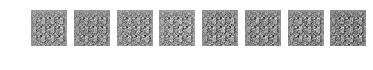

	Epoch: 2,  Discriminator Loss: [7.971192 0.5     ]


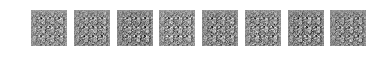

KeyboardInterrupt: ignored

In [0]:
half_batch = int(BATCH_SIZE/2)
for epoch in range(200):

  cum_d_loss = 0.
  cum_g_loss = 0.
  
  for batch_idx in range(num_batches):
    indxs = np.random.randint(0, X_train.shape[0],half_batch)
    imgs = X_train[indxs]
    labels = y_train[indxs]
    
    noise_data = generate_noise(half_batch, 100)
    random_labels = generate_random_labels(half_batch)
    generated_images = generator.predict([noise_data, labels])
    
    d_fake_loss = discriminator.train_on_batch([imgs, labels], np.ones((half_batch,1)))
    d_art_loss = discriminator.train_on_batch([generated_images, labels], np.zeros((half_batch,1)))
    d_loss = np.add(d_fake_loss,d_art_loss) * 0.5
    cum_d_loss += d_loss

  print('\tEpoch: {},  Discriminator Loss: {}'.format(epoch+1, cum_d_loss/num_batches))
  show_samples("epoch" + str(epoch))

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


	Epoch: 200,  Discriminator Loss: [9.8033688e-08 7.1428575e-02]


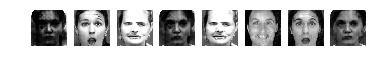

13.344376


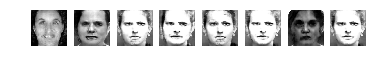

7.009482


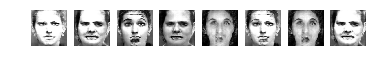

0.18500201
	Epoch: 200,  Discriminator Loss: [0.36184543 0.03571429]


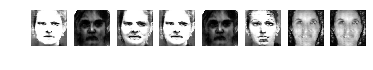

10.771215


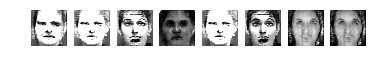

9.74912


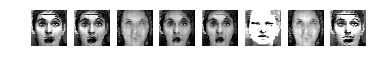

8.119486
	Epoch: 200,  Discriminator Loss: [0.19819275 0.04821429]


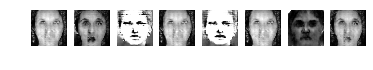

8.142935


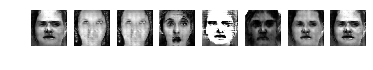

6.9098473


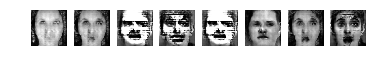

5.2985244
	Epoch: 200,  Discriminator Loss: [0.1756167  0.03571429]


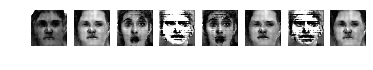

3.8948562


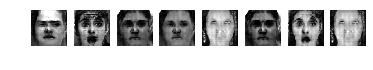

2.8856933


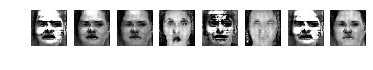

1.3935486
	Epoch: 200,  Discriminator Loss: [0.04900238 0.05178571]


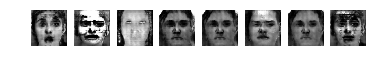

3.8103843


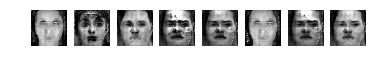

2.5283673


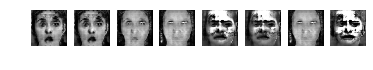

2.0655131
	Epoch: 200,  Discriminator Loss: [0.07185157 0.04464286]


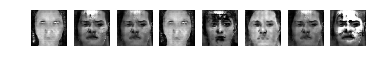

5.357563


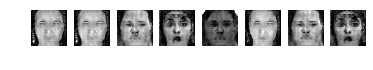

4.6741805


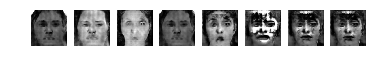

2.7629666
	Epoch: 200,  Discriminator Loss: [0.09694453 0.04285714]


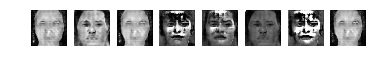

4.0109377


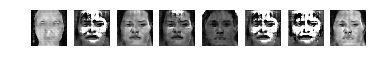

3.93061


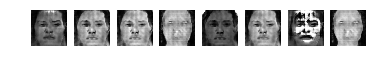

2.9261851
	Epoch: 200,  Discriminator Loss: [0.01765643 0.06428571]


KeyboardInterrupt: ignored

In [0]:
# noise_data = generate_noise(BATCH_SIZE, 100)
# random_labels = generate_random_labels(BATCH_SIZE)
# generated_images = generator.predict([noise_data, random_labels])
# d_art_loss = discriminator.train_on_batch([generated_images, random_labels], np.zeros((BATCH_SIZE,1)))
# fig = plt.figure()
# #   plt.suptitle(f'Epoch: {epoch+1}')
# for i in range(num_classes):
#   plt.subplot(1,num_classes,i+1)
#   #       plt.title(f'{i}')
#   plt.imshow(generated_images[i,:,:,0]*(-1), cmap=plt.cm.binary) # *-1 because plt inverts colors for some reason (255 is black)
#   plt.axis('off')
# print(d_art_loss)

# indxs = np.random.randint(0, X_train.shape[0],BATCH_SIZE)
# imgs = X_train[indxs]
# labels = y_train[indxs]

# d_fake_loss = discriminator.train_on_batch([imgs, labels], np.ones((BATCH_SIZE,1)))
for i in range(100):
  if(i % 3 == 0):
    indxs = np.random.randint(0, X_train.shape[0],half_batch)
    imgs = X_train[indxs]
    labels = y_train[indxs]
    
    noise_data = generate_noise(half_batch, 100)
    random_labels = generate_random_labels(half_batch)
    generated_images = generator.predict([noise_data, labels])
    
    d_fake_loss = discriminator.train_on_batch([imgs, labels], np.ones((half_batch,1)))
    d_art_loss = discriminator.train_on_batch([generated_images, labels], np.zeros((half_batch,1)))
    d_loss = np.add(d_fake_loss,d_art_loss) * 0.5
#     cum_d_loss += d_loss
    print('\tEpoch: {},  Discriminator Loss: {}'.format(epoch+1, d_loss/num_batches))
  noise_data = generate_noise(BATCH_SIZE, 100)
  random_labels = generate_random_labels(BATCH_SIZE)
  g_loss = gan.train_on_batch([noise_data, random_labels, random_labels], np.ones((BATCH_SIZE, 1)))
  show_samples(i)
  print(g_loss)

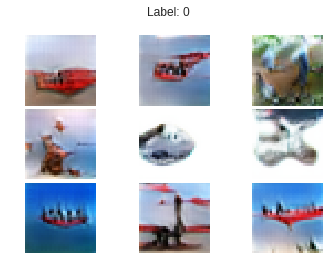

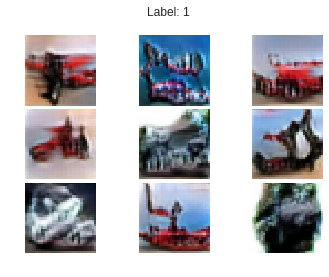

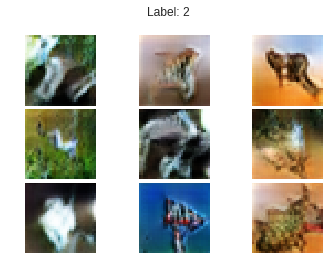

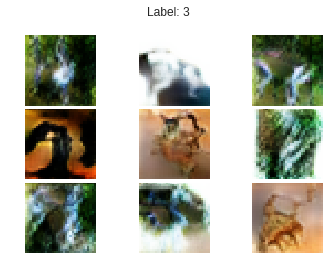

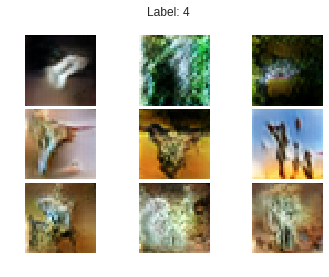

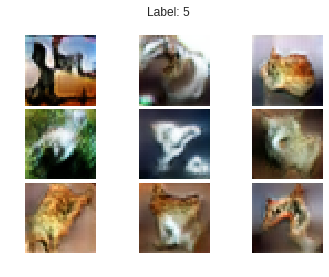

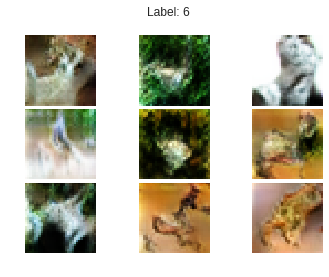

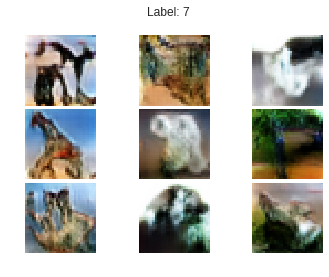

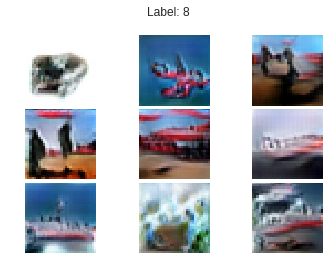

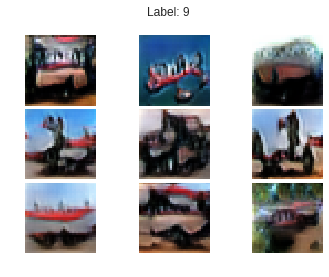

In [0]:
for classlabel in range(10):
  lbls = one_hot_encode([classlabel] * 9)
  noise = generate_noise(9, 100)
  gen_imgs = generator.predict([noise, lbls])

  fig, axs = plt.subplots(3, 3)
  plt.subplots_adjust(hspace=0.05, wspace=0.05)
  count = 0
  for i in range(3):
    for j in range(3):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      plt.suptitle('Label: ' + str(classlabel))
      count += 1
  plt.show()
  plt.close()  